<a href="https://colab.research.google.com/github/LeonimerMelo/CNNs/blob/main/CNN_MNIST_digits_optimizers_comparison_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import keras # Import the Keras library
from keras.datasets import mnist # Load the MNIST dataset
from keras.models import Sequential # Initialize a sequential model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend
import numpy as np

In [ ]:
# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Print the shape of the training and test data
print(x_train.shape, y_train.shape)
# Reshape the training and test data to 4 dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(60000, 28, 28, 1)


In [ ]:
# Convert the labels to categorical format
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(x_train.max(), x_train.min())
# Convert the pixel values to floats between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(x_train.max(), x_train.min())

255 0
1.0 0.0


In [ ]:
backend.clear_session()
model = Sequential()
model.add(Input((28,28,1))) # Define the input shape
model.add(Conv2D(kernel_size=5, filters=16, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
initial_weights = model.get_weights()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
def processing_time(start_t, finish_t):
  tot_seg = finish_t - start_t
  t_min = tot_seg // 60
  t_seg = tot_seg % 60
  print("\nTempo de treinamento da rede:%2im%2is"% (t_min, t_seg))

In [ ]:
import time
start_time = time.process_time()
model.set_weights(initial_weights)
h=model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.1)
processing_time(start_time, time.process_time())

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7576 - loss: 0.8928 - val_accuracy: 0.9260 - val_loss: 0.2614
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9135 - loss: 0.3063 - val_accuracy: 0.9455 - val_loss: 0.1987
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9340 - loss: 0.2341 - val_accuracy: 0.9578 - val_loss: 0.1586
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9488 - loss: 0.1751 - val_accuracy: 0.9687 - val_loss: 0.1290
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9579 - loss: 0.1486 - val_accuracy: 0.9687 - val_loss: 0.1213
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9646 - loss: 0.1244 - val_accuracy: 0.9750 - val_loss: 0.0978
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9688 - loss: 0.1115 - val_accuracy: 0.9762 - val_loss: 0.0898
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9710 - loss: 0.1024 - 

In [ ]:
import matplotlib.pyplot as plt
# Função para plotar os gráficos da acurácia (accuracy) e da perda (loss)
def plot_acc_loss(h,model):
  plt.figure(figsize = (11,5))
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Função Custo')
  plt.title('loss')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(h.history['accuracy'], label = 'Treino')
  plt.plot(h.history['val_accuracy'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.title('accuracy')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.suptitle('model: '+str(model))
  plt.subplots_adjust(top=0.88)
  plt.show()

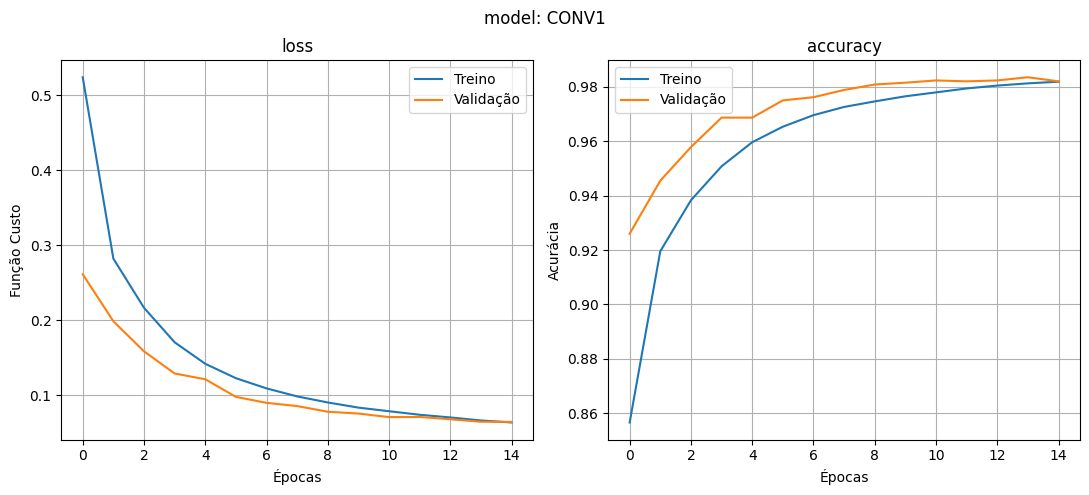

In [ ]:
plot_acc_loss(h,'CONV1')

In [ ]:
# utilizando o modelo para fazer as predições
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([2.4834006e-07, 8.7777332e-09, 1.1577027e-05, 2.1369464e-04,
       1.1273407e-09, 8.9428596e-08, 2.1262918e-12, 9.9974507e-01,
       8.8252926e-07, 2.8520866e-05], dtype=float32)

In [ ]:
y_predict = np.argmax(y_pred,axis=1)

In [ ]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
y_test_ = np.argmax(y_test,axis=1)

In [ ]:
y_test_

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_, y_predict)

0.9809

In [ ]:
"""
  Builds a CNN model for MNIST digit classification.

  Args:
    optimizer: The optimizer to use for training the model.

  Returns:
    A compiled Keras model.
  """

def build_model(optimizer):
    model = Sequential()
    model.add(Input((28,28,1))) # Define the input shape
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Define the batch size
batch_size = 30
# Define the number of epochs to train the model for
epochs = 5
optimizers=['Adagrad','Adam','SGD', 'RMSprop']
histories ={opt:build_model(opt).fit(x_train,y_train,batch_size=batch_size,
  epochs=epochs,verbose=1,validation_data=(x_test,y_test)) for opt in optimizers}

Epoch 1/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6057 - loss: 1.4702 - val_accuracy: 0.8988 - val_loss: 0.3600
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8993 - loss: 0.3517 - val_accuracy: 0.9237 - val_loss: 0.2646
Epoch 3/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9202 - loss: 0.2737 - val_accuracy: 0.9341 - val_loss: 0.2224
Epoch 4/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9349 - loss: 0.2298 - val_accuracy: 0.9420 - val_loss: 0.1949
Epoch 5/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9414 - loss: 0.2061 - val_accuracy: 0.9497 - val_loss: 0.1740
Epoch 1/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9111 - loss: 0.2908 - val_accuracy: 0.9747 - val_loss: 0.0781
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9894 - val_loss: 0.0317
Epoch 3/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9908 - loss: 0.0293 - val_accu


 Adagrad


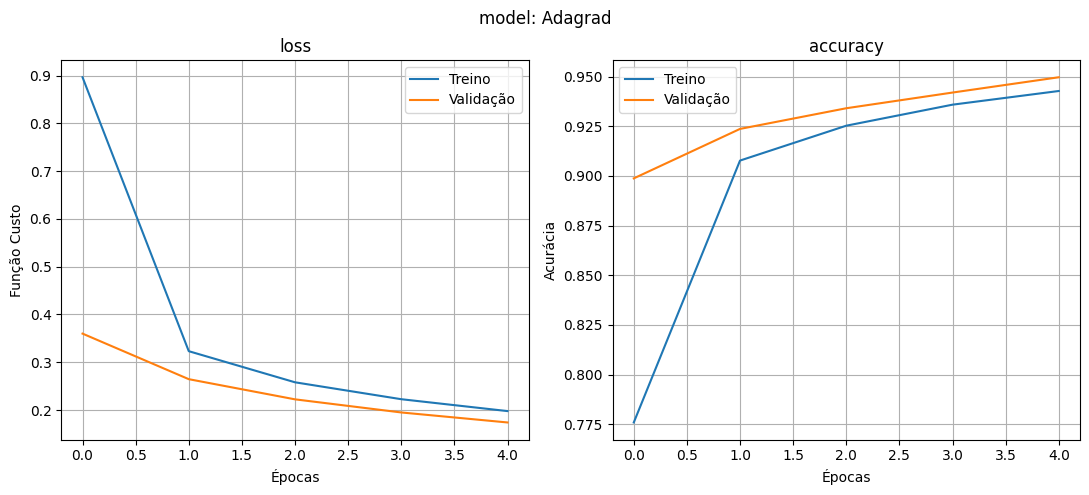


 Adam


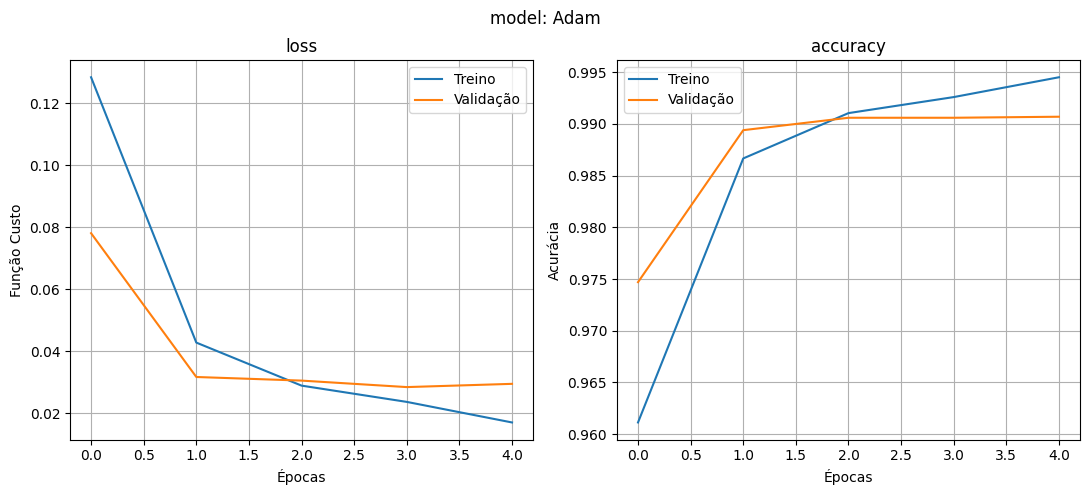


 SGD


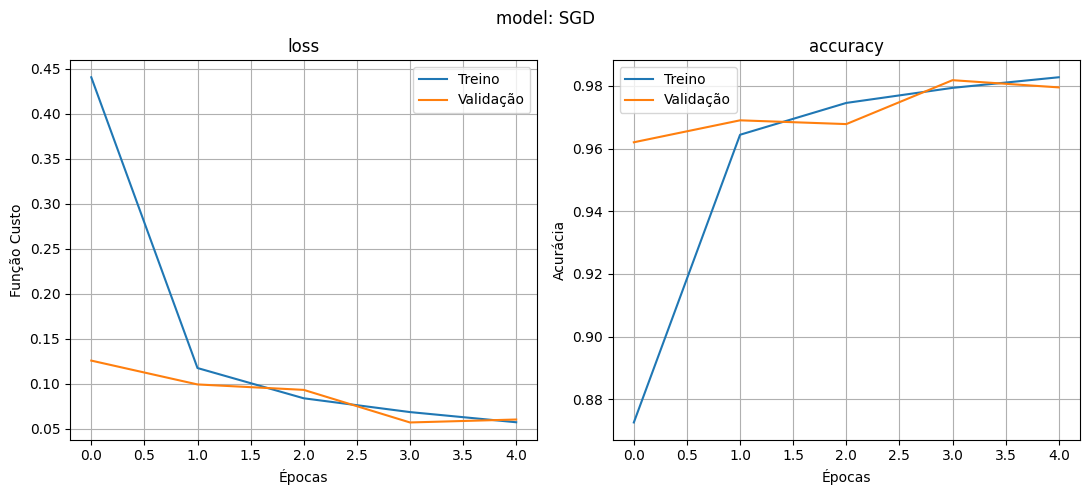


 RMSprop


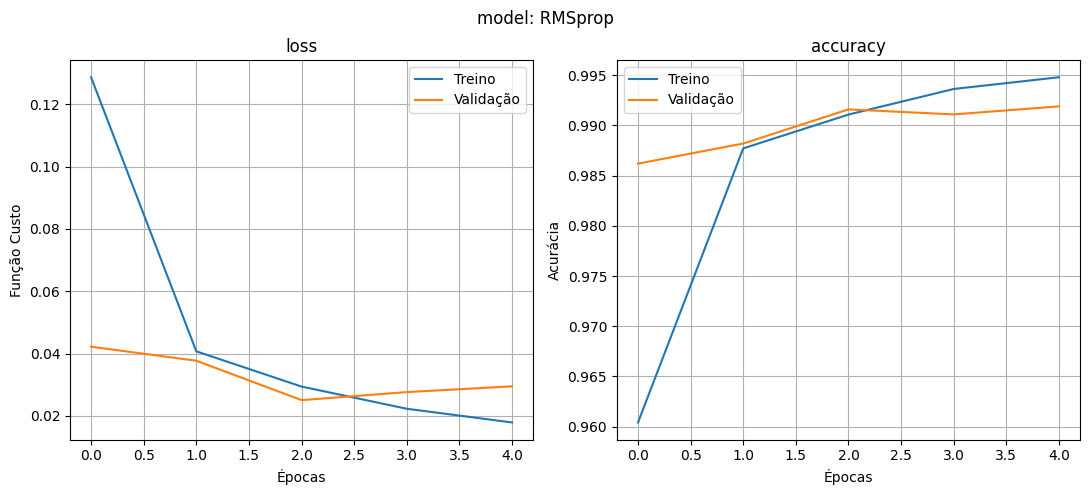

In [ ]:
for key, value in histories.items():
  print('\n',key)
  plot_acc_loss(value, key)

##Exercícios
1. Proceda a sintonia dos hiperparâmetros da rede (batch_size, epochs) na tentativa de uma melhor eficiência nos resultados dos treinamentos.
1. Introduza camadas de regularização (dropout e outros) e compare dos resultados.
1. Mude o learning_rate dos otimizadores e compare os resultados.
1. Compare os resultados obtidos aqui com o modelo de rede CNN com os obtidos nos notebooks anteriores com a rede Deep Learning fully conected. Analise e comentes os resultados.

##Referências
[1] https://www.sciencedirect.com/science/article/pii/S2214785321013316

[2] https://link.springer.com/article/10.1007/s11045-022-00819-x

[3] https://arxiv.org/pdf/1910.05446

[4] https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008

[5] https://towardsdatascience.com/neural-network-optimization-algorithms-1a44c282f61d